In [24]:
# Library imports

import pandas as pd
import numpy as np
import ipywidgets
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Import dataset

df= pd.ExcelFile('https://cdn-assets.theforage.com/vinternship_modules/kpmg_data_analytics/KPMG_VI_New_raw_data_update_final.xlsx')

In [15]:
transactions_df = pd.read_excel('KPMG - Original.xlsx', sheet_name = 'Transactions', header=0, skiprows=[0] )
transactions_df.set_index('transaction_id', inplace = True)
transactions_df.dropna()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0


In [16]:
# Grouping based on 'product line' and 'standard cost'

grouped = pd.DataFrame(transactions_df.groupby("product_line")["standard_cost"].sum())
grouped = grouped.reset_index()

In [17]:
# Grouping based on 'product line' and 'list price'

grouped1 = pd.DataFrame(transactions_df.groupby("product_line")["list_price"].sum())
grouped1 = grouped1.reset_index()

In [18]:
# Product line merge

product_line = grouped.merge(grouped1, left_on='product_line', right_on='product_line')

In [30]:
# Transaction Date Group

group = pd.DataFrame(transactions_df.groupby(['product_line','transaction_date'])["standard_cost"].sum())
group.reset_index(inplace = True)

In [34]:
# Importing the customer address dataset

address_df = pd.read_excel('KPMG - Original.xlsx', sheet_name = 'CustomerAddress', header=0, skiprows=[0])

In [35]:
# Grouping based on the state

address_df['state'] = address_df['state'].replace({'NSW':'New South Wales', 'QLD':'Queensland', 'VIC':'Victoria'})
grouped2 = pd.DataFrame(address_df.groupby("state")["customer_id"].sum())

# DATA VISUALIZATION FOR UNDERSTANDING MARKETS AND CUSTOMERS
##### By Siddhesh Unhavane and Asim Chitre

Sprocket is a hypothetical cycle reseller located in Australia. Sprocket mainly deals with used and new cycles and its parts. Since, any business requires a report in order to understand the operations and yearly progress, deepdive into Sprocket's business operations through transaction. If the data is correctly analyzed, the insights obtained from the analysis can be conveyed through visualizations which will help Sprocket make important business decisions based on the visualization

### Sales Analysis according to Online and Offline Purchases

In [27]:
x_widget = ipywidgets.Dropdown(options=transactions_df[['list_price','standard_cost']], description='x')

@ipywidgets.interact(x=x_widget)
def line_plots(x):
    fig, ax = plt.subplots(figsize=(15,8))
    ax = sns.lineplot(x="transaction_date", y=x, data = transactions_df, ci=None, hue="online_order",
                     palette = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True))
    ax.set_title('STANDARD COST VS LIST PRICE AS PER MODE OF PURCHASE OVER TIME')

interactive(children=(Dropdown(description='x', options=('list_price', 'standard_cost'), value='list_price'), …

Since we live in a digital era, the question is whether to invest in online sales and improve the website to accept more payments and more customers online or to stay the same. Changing business model is a key step but change is necessary for the business to thrive. The blue line is for orders that were placed 'offline' and the orange line are the orders that were placed 'online'. Initially there were more 'ofline' orders which challenged the online-focused strategy. Then suddenly, there were numerious peaks for 'online' orders. But overall more orders are placed 'offline' which nullifies the efforts for improving the online interface. To add further to the insights, Australia faces cold temperatures between June and August. Evidently, the number of sales significantly decreases in that period because no body want to use cycle as their mode of transportation in low temperatures.

### Product Line wise Standard Cost and List Price comparision.

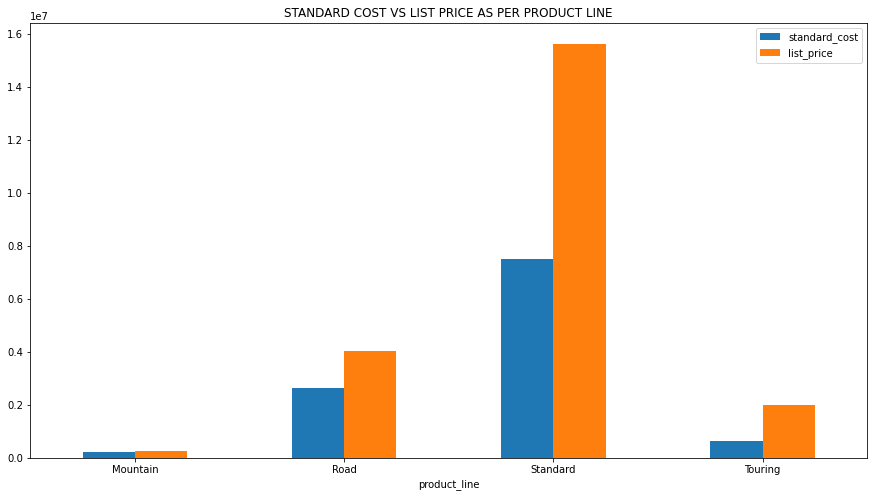

In [32]:
product_line.plot(x='product_line', kind='bar', rot=0, stacked=False, figsize=(15,8), title='STANDARD COST VS LIST PRICE AS PER PRODUCT LINE')

The bar chart is a grouped bar chart because the two bars are grouped together. The attributes that are grouped together are the 'standard cost' and 'list price'. Further, these attributes are categorized on the basis of 'product line' to give a product line wise analysis. The disparity between the list price and standard cost for the 'standard' product line is very large. Then it is followed by 'touring', 'road', and finally 'mountain'. The chart shows that the store has been selling the products at a discounted rate for the 'standard' product line and is able to compensate for the loss because of the large volume of sales happening that product line. Clearly 'mountain' product line is being sold at-cost or is making very less profits for the store.

### Daily sales as per Product Line

Text(0.5, 1.0, 'POS Transaction Counts as per Date and Product Line Categories.')

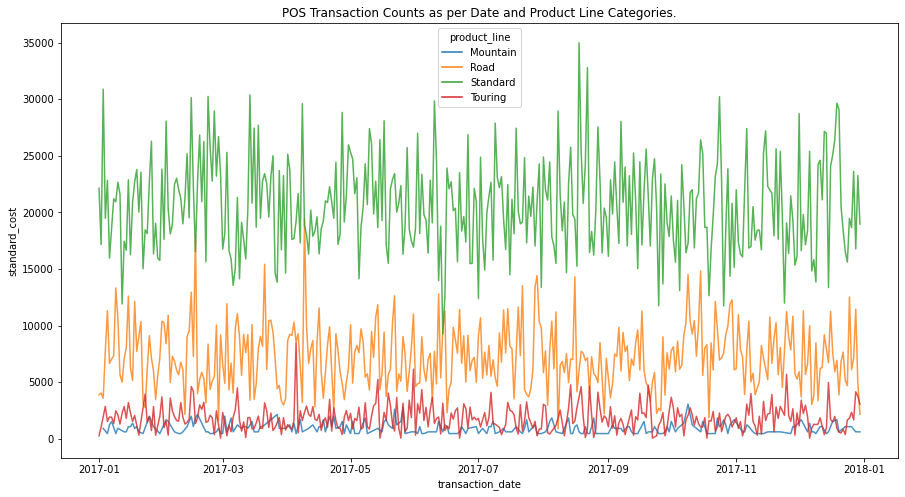

In [33]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(x="transaction_date", y="standard_cost", data = group, hue="product_line", alpha = 0.8)
ax.set_title('POS Transaction Counts as per Date and Product Line Categories.')

The above graph is a line graph that shows daily transactions of products that are categorized by four main categories namely Mountain, Road, Standard, and Touring. These categories are generally related to the type of cycle or the products/parts related to a category of cycle. From this visualization it is evident that the volume of transaction is very large for 'standard' product line. Hence, it is safe to assume that the demand for the 'standard' product line is more and more inventory must be kept for 'standard' product line. Also, we can assume that the market for 'mountain' and 'touring' cycles are very niche because the number people actually interested in mountain biking or touring biking are really few. This can be a motivation to do promotional campaigns to widen the market for the niche category or focus and improve the marketing strategy for the top two categories i.e., 'standard' and 'road'.

### State-wise customer count

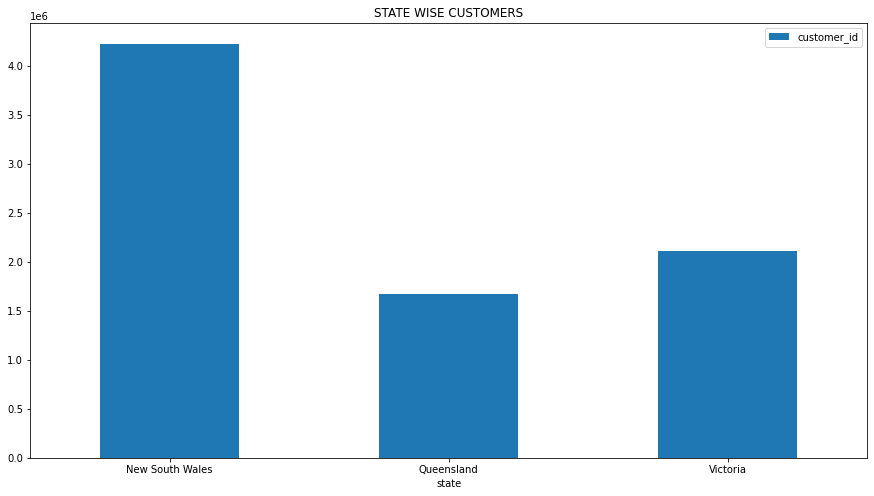

In [39]:
grouped2.plot(kind='bar', figsize=(15,8), rot=0, title = 'STATE WISE CUSTOMERS')

Moving away from the transactions and money, we focus on the customer demographics to understand where our majority of the customers come from. The majority of the customers come from New South Wales which is the located on the eastern side of the Australia. Suprisingly all three states are located on the eastern side of Australia. Although, area-wise Queensland is the biggest among all three, the customer base for cycle is significantly low. This may be the evidence of a lack of cycle makret in Queensland or the disinterest of population of Queensland in cycles. But according to the census of 2016, New South Wales is the highest populated state followed by Victoria and Queensland. But it comes as a shocker that Queensland has less number of customers even after being significantly populated.